# Hello visitor,
This is a quick notebook explaining the structure behind the code used in [this paper](https://arxiv.org/abs/1701.01501) where I will go over the basic functions you might find interesting to use. I must therefore admit that the structure is a bit of a mess. However it is not **too** bad.

The code is split up in a multitude of functions that can do things for you. If you are thinking of picking up the project, I will go over the few functions that I think would be the most useful ones. What makes the architecture messy is that these are spread over many .py files whose name are not always indicative of the function's uses. Moreover some functions in one .py file may use functions found in some other .py files. On top of all this, a lot of the code is made of older functions that may not be useful anymore. I may clean them up one day, as of now, most of the useful functions can be found in the *EvSim.py* module.


### Aggregating interesting functions in a single .py files {useful read (maybe?) if you are new to python}.
If you wish to clean things up in a single .py file, you could create a new document which imports all the previous modules and copy/paste any functions you like into it. An example, if I have a function *calcq()* in *qstatistics.py* whose code looks like,

In [5]:
def calcq(e1vec,e2vec,e3vec,CQ=0):
    if(CQ==0): cq=calcqOriginal(e1vec,e2vec,e3vec)
    if(CQ==1): cq=sf.calcqV3(e1vec,e2vec,e3vec)
    return cq

Just create a new file that imports all the modules, and copy paste the above function in there. Note that my function above calls another function in the same module, namely *qstatistic.py* and some variable in the module named *sf* which is the shorthand I used for *statisticfunctions.py*. Hence for this function to work in the new document we need to make sure we add at the top *import statisticfunctions as sf* and also change the *calcqOriginal()* to let python know that this function is found in *qstatistics.py*. If done correctly, this new document will look like,

In [ ]:
import qstatistics as qs
#reload(qs)
import statisticfunctions as sf
#reload(sf)
#import ...
#import all other modules with the names they were given in a certain .py module

def calcq(e1vec,e2vec,e3vec,CQ=0):
    if(CQ==0): cq=qs.calcqOriginal(e1vec,e2vec,e3vec)
    if(CQ==1): cq=sf.calcqV3(e1vec,e2vec,e3vec)
    return cq


I also suggest you to add a *reload([module name])* after each import of the .py files I wrote. The reason is that when importing something in the ipython environment, the module is cached. Hence if you make a change in say, *qstatistic.py* and then write *import qstastistic.py as qs*, the change will not load because ipython saw that this was already imported once. A reload will force it to reload the module and make the changes. The reload function is not already loaded if using python 3 or higher, hence you can add these lines of code at the top of your document to load it.

In [14]:
import sys
if(not sys.version_info[0]<3):
    from importlib import reload #reload function is from a module for python 3 and higher


### How to build a halo.

We focus on building the observed photons obtained from a single source. This requires the generation of events. To do this we use the following function found in *EvSim.py*, one can consult the pdf manual to learn about its arguments and output. Note that we are importing the module *UserInput.py* which acts as a single python file where certain global variables are initialized. For instance, in UserInput we can set the value of the magnetic field strength and choose a specific functional form for it (see the pdf manual once gain for the choices).

In [40]:
import EvSim as es
import UserInput as UI

#The first argument is the distance between Earth and the source in Mpc
#The Second argument is the number of observed photons to simulate
#The third argument chooses to save the output in a file called 'sim_data/3devents/case'+str(cn)+'/3devents'
#                                                   and    'sim_data/3devents/case'+str(cn)+'/3deventsangle'
#The fourth argument is the strength of the surrounding magnetic field in Gauss
events,evsangle=es.SimEvent(UI.dS,50,cn=1,B0=UI.B0)

Running this function will simulate 50 secondary photons due to the source's emission. The output is two numpy arrays, *events* and *evsangle*.

In [11]:
import numpy as np
print(np.shape(events))
print(np.shape(evsangle))

(50, 3)
(50, 4)


The events vector contain the $(x,y,z)$ coordinates of the PP locations of our events. The evsangle vector contains information about the angles and the energies, namely the 4 components of each entries are $(\delta-\theta,\phi,E_{\text{GeV}},\theta)$. Now we can a simulated halo that we can start analyzing however we wish.

You may have noticed an error "Distributions do not exist, setting UI.STODE==0". This occured because the code requires the probability distributions describing the electromagnetic cascade. If these are not available, the code automatically toggles off the stochasticity in the lepton's propagating distance. A function can generate these for you, it is found in the *propdist.py* module. Note that it generates distributions between two energies $E_{min}$ and $E_{max}$ which are the cutoff specified in the *UserInput.py* modules. Hence if you decide to change $E_{min}$ to some lower value, make sure you rerun this code to generate distributions that covers this energy scale. You could set $E_{min}\sim 1~\text{GeV}$ and $E_{max}\sim 70~\text{GeV}$ and as long as you simulated observed event in this range you shouldn't have to worry about it anymore (probably).

In [ ]:
import propdist as pd
pd.finddist(100) #As the distributions are found numerically, it takes kind of step size as argument.
                # Leaving it at 100 seems to be more than accurate for our purposes.

Before reading forward, I'd advise to run the above code, wait til it is done and then rerun the piece of code that generates the events. 

To better understand what we have here, there is a plotting function in the *EvSim.py* module that can vizualise these events; it is just basic matplotlib code but we can use it quickly! The function is *cpJS(cn=1,jet=False)*, it looks for the events saved in the folder named with $cn=1$ and plots them. The argument $jet=False$ lets it know to use all the events simulated as we have not yet specified a jet. The function outputs an image of the events and names it

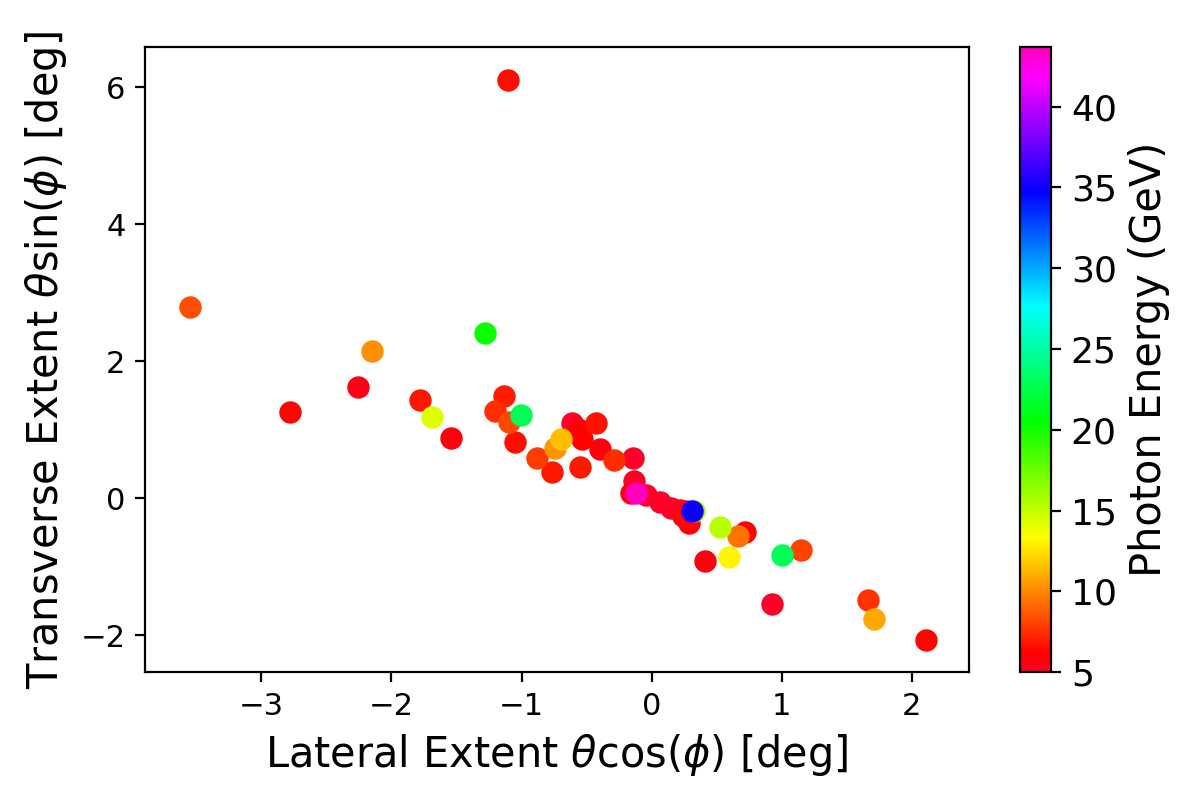

In [35]:
es.cpJS(cn=1,jet=False,name='skyimage',lsizerescale=0.65) #saves an image of the events in the case1 
                                                          #folder with name skyimage.png
                                                          # lsizerecale is used to rescale the labels if needed.
from PIL import Image
Image.open("sim_data/3devents/case1/skyimage.png")


Similarly, we can look at the PP locations of these events with another function. For reasons I won't go into, the jet visualization of this function never turned out good, so here we simply don't have to worry that we haven't simulated a jet. The function is also found in the *EvSim.py* module,

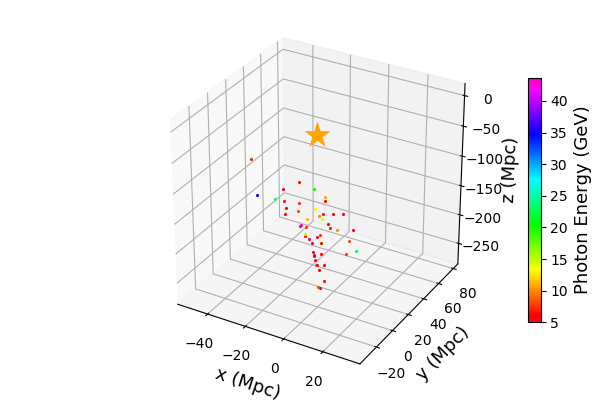

In [38]:
es.createplot3DEvs(1,3,sizemarker=5) #saves a 3d plot of the PP locations of the events in cn=1 (first argument)
                                  # in an image named 3dimg_4 , the 4 comes from the second argument ( 3+1 = 4 ).
Image.open("sim_data/3devents/case1/3dimg_4.png")

### Simulating a Jet
To simulate a jet, we apply a cut to events previously generated. This is done with the function *es.JetEvs()* which looks up the events of case $cn$ and randomly applies a cut to them. Here the function has an argument from the *globalvars.py* module which contains numbers that are found throughout the different *.py* files. For instance, we employ *gv.degrad=np.pi/180* to change degree to radians when determining $omega$, the openning angle of the jet.. The jets are randomly selected to either contain Earth in its line of sight (when $jetfix=True$) or to be centered around a randomly selected event (when $jetfix=False$). As we want to deal with blazars, it is best to leave $jetfix=True$ at all times. The $doplots$ arguments just tells the function to create images such as $skyimage.png$ but only using the photons originating from the jet. $NumJet$ tells us how many jets to simulate given the events generated and placed in the folder labelled by $cn$.


In [39]:
import globalvars as gv
es.JetEvs(NumJets=1,omega=5*gv.degrad,cn=1,doplots=True,jetfix=True)

This function contains line such as,

In [ ]:
np.savetxt('sim_data/3devents/case'+str(cn)+'/jetopenning_'+str(jetcount),[omega])
np.savetxt('sim_data/3devents/case'+str(cn)+'/jetdir_'+str(jetcount),jetSelCart)
np.savetxt('sim_data/3devents/case'+str(cn)+'/jetcart_'+str(jetcount),jetevs)
np.savetxt('sim_data/3devents/case'+str(cn)+'/jetang_'+str(jetcount),jetang)


I.e. it saves a bunch of files in the $cn$ folder which contains the subset of events selected from *events* (*jetevs*) and *evsangle*(*jetang*). It also saves *omega* and the cartesian direction at which the jet is pointing in *jetSelCart*. The files containing the above information is labelled by an integer *jetcount* who takes the value from 1 to $NumJets$.

## Changing the Magnetic Field, Halo Power Spectrum and Other Distributions.

At this point, we can generate a halo from any sources. However these depend on certain parameters that we haven't yet described how to set.
 ### Electromagnetic Cascade Distributions
  These are generated in the *propdist.py* module, I won't describe the details of these here but feel free to check it out or send me an e-mail about any questions you have. 
  ### The source spectrum
  This is easy to modify. The distribution of Eq. (3.1) (in the paper) , it can be found in the *drawEnergy()* function in the *globalvars.py* module.
  ### Magnetic Field
  The most interesting thing to change! The magnetic field is a function defined in the *constraint.py* module. As a side note, this module also contains all the constraint equations that we must solve. The field takes in 3 arguments, i.e. $B(x,y,z)$, with $x,y,z$ being the coordinates of interest in Mpc. The function is initialized to one of the standard cases at the start of the code (see manual for what the standard cases are). However it can be changed at any time by defining some new function that takes in coordinates and setting $co.B$ equal to it.

In [54]:
import constraints as co #this initializes B within the python environment 
                         #(if it was not done already!! Recall the reload discussion)
#example of how to change B
def newB(x,y,z):
    return UI.B0*np.array([1,1,1])/np.sqrt(3)
print('old B =',co.B(1,1,1))
co.B=newB #set B to be a constant magnetic field of magnitude UI.B0
print('new B =', co.B(1,1,1))

old B = [  2.51300954e-16   9.99684189e-15   0.00000000e+00]
new B = [  5.77350269e-15   5.77350269e-15   5.77350269e-15]


Hence in this way we can set a $B$, run a simulation, then set a new $B$, run a new simulation and so on.

## Putting it all together
 There is one function that puts all the above together and generates $N$ simulations with a random magnetic field (RMF) with parameters $k$, $B_{rms}$ and $f_H$ (see the paper for the definition of these parameters).
 The function is *SimNHalos* in the *EvSim.py* module. All the arguments of this function are discussed in the manual and so I won't repeat it here.
 
For instance, to generate the simulations that gave rise to the curves of image of Fig. 12 (in the paper), we would call (note that some parameters such as the jet opening *omega* are not written out as they are optional arguments and take on some default values. Consult the manual for more info.)

In [ ]:
es.SimNHalos(N=100,kmode=0.01,Nmodes=5,hel=1,cns=100,CQ=1,B0=1e-14,Nphotons=1000)

This will take some time, but will generate all the data in folders named $case[i]$ with $[i]$ taking values from $cns=100$ to $cns+99$. The folders also contain the $Q$ statistics of each realization. We will discuss the functions that can compute this value shortly. However before we do so, let me just mention another useful visualization tool. Images such as the ones we produced above are not automatically generated by *SimNHalos*, however there is a little interface that allows us to create them and look at them on the fly.

To test this interface, let us create 10 simulations with $Nphotons=50$ and we will place them in the folder $case[i]$ with $i\in {10,19}$, this may take a few seconds.

In [56]:
es.SimNHalos(N=10,kmode=0.01,Nmodes=5,hel=1,cns=10,CQ=1,B0=1e-14,Nphotons=50)

Once done, we can call the function *SSsky(10)* in *EvSim.py*. This function will show the plots found in the folder case10, and if they don't exist, it will create them for you beforehand (hence it may be slow to run if this must occur). Here is the fun thing about *SSsky*, if you right click on the figure, it will automatically call $SSsky(n+1)$, and if you shift-right-click, it will call $SSsky(n-1)$. This gives us a quick way to check the data generated by our simulations. Let's try it.

/home/phrenk/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


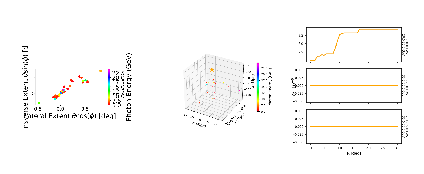

In [57]:
es.SSsky(10)

There is some deprecation warning, but we can ignore this. Unfortunately for us, the function does not work so wonderfully in this notebook tutorial. However running it in ipython will work. Test it!

## Computing the Q-statistics.
The easiest way to compute the Q-statistic is through the use of *QfromEvs* in *EvSim.py*.
What this function does is go into the folders $case#'s$ and compute $Q$ for the simulated data. Its first argument takes in an **array** of integers denoting the files (the #'s in the $case#$) in which the Q computation must be done. It also has an argument $CQ$ that you've also seen in the *SimNHalos* function. The $CQ$ argument tells us what type of Q-statistic to use, i.e. $CQ=0$ is the original and $CQ=1$ is the one when we include the $\theta$ term discussed in the paper. Let us compute $Q$ for the original version,

In [59]:
listofsimulation=np.arange(10,20)
es.QfromEvs(listofsimulation,Qstart='Qv1_',CQ=0,name='plotofaverageQ')

The argument $Qstart$ is a prefix under which the new Q's are saved. Namely in the above case, case10 will now have the Q data stored in *Qv1_[jetnumber]_bin_[energybinnumber]* . The energy bins and the maximum radius $R$ are parameters that must be set in the *UserInput.py* file.

The function *QfromEvs* actually does an additional thing. It plots the average of the $Q$ given in our list, it does so by calling the next function we will describe. This is the reason why we supplied the variable *name*.


### Plotting the $Q$'s
Once we have a set of $Q$'s we may want to plot them. This is done with *QsPlot*,

In [ ]:
es.QsPlot(N=2,cns=10,name='_',plotallQ=True,Qstart='Q_',EvsList=False,evsSP=False,evstype='hel')

If one looks at the function in the code, it has a LOT of arguments. Some a are bit contrived as it was written in a poor way. I invite you to change this. Basically it allows you to plot three different set of Q's to make the figures such as Fig. 13, or a single Q such as Fig 12.

Let us do a single Q first. We can set $N$ and $cns$ with $EvsList=False$. This will plot the average of the Qs from $case[cns]$ to $case[cns+N-1]$. Alternatively, if you supply an **array** of integers to $EvsList$, as we did for the function *QfromEvs*, this will overwrite whatever value of $N$ and $cns$ was chosen and the average will be done over these cases. Here the *Qstart* variable tells the function which type of files contain $Q$, i.e. if we have $Qv1_$ for $CQ=0$ and $Q_$ for $CQ=1$. Finally, the *plotallQ* will determine if we plot the individual Q curves of not; if set to True, you will generate the left side of Fig 12, while if set to False, you will generate the right side of Fig 12.

The name variable is to determint the name of the figure that you will plot. It will be placed in the folder and named, 'sim_data/QSimPlots/Q_[name]'. Let us illustrate this.


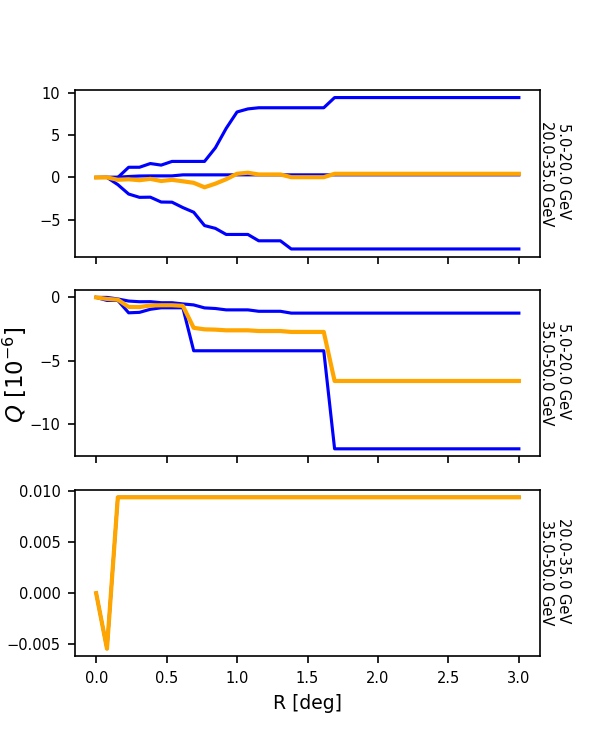

In [61]:
array=[10,12,13,14]
es.QsPlot(N=2,cns=100,name='_',plotallQ=True,Qstart='Q_',EvsList=array,evsSP=False,evstype='hel')
Image.open("sim_data/QSimPlots/Q__.png")


The arguments *evsSP* and *evstype* are useful when we want to compare $Q$'s from different realizations. You can pass to *evsSP* an array containing two lists of integers and *EvsList* a third list. Then the function will plot all three together. In this case, because $evsSP\ne False$, the function will assume $plotallQ=False$.

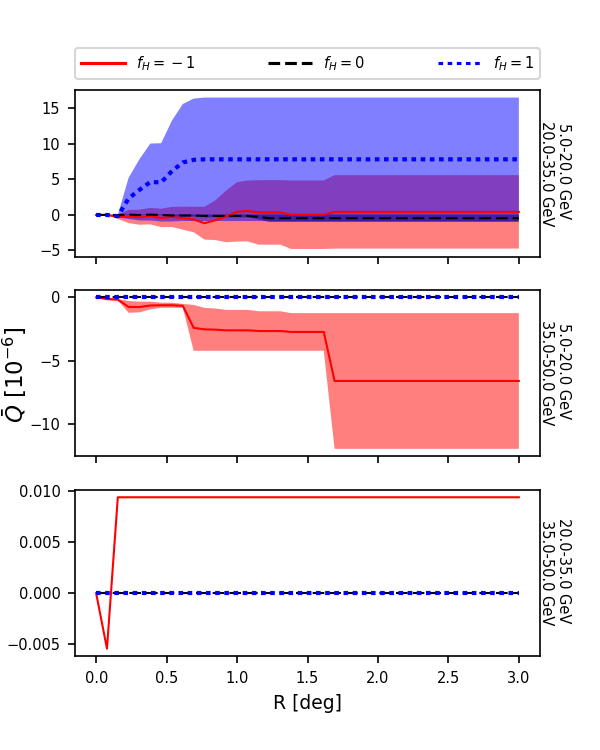

In [62]:
array=[10,12,13,14]
twootherlists=[[15,16,17],[18,19]]
es.QsPlot(N=2,cns=100,name='temp',plotallQ=True,Qstart='Q_',EvsList=array,evsSP=twootherlists,evstype='hel')
Image.open("sim_data/QSimPlots/Q_temp.png")

One can see that we do not have much statistics to make this plot look interesting. But now we see how the final argument comes into play. *evstype* determines the legend that will be used. It can have three values: 'hel', 'k', 'B'. Let us try it with 'B', saying we want to compare $Q$'s generated from realization having a RMF of rms.

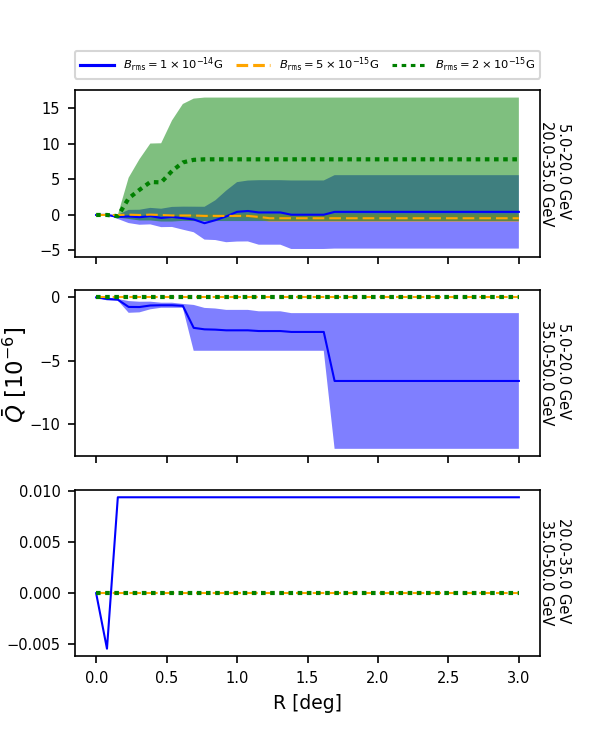

In [63]:
array=[10,12,13,14]
twootherlists=[[15,16,17],[18,19]]
es.QsPlot(N=2,cns=100,name='temp',plotallQ=True,Qstart='Q_',EvsList=array,evsSP=twootherlists,evstype='B')
Image.open("sim_data/QSimPlots/Q_temp.png")

Unfortunately, the legend at the top needs to be manually changed in the code itself. Hence this last argument may be kind of useless. There are many examples of such incomplete/lame features in this code. I apologize if you end up having to deal with those.

### Final Remarks about the computation of Q
If you read the lab manual, you will see other functions that can compute $Q$. These are less featured but are sometime called by the ones introduced here. An important one is *qstatistics.analyzeq* which takes in a set of events and simply calculates their $Q(R)$ curves with no additional stuff coming with it. For instance, you might just want to generate events and calculate their $Q(R)$ right away, then you could just call $es.EvSim$, split up the events in the energy bins of your choosing based on their energies (a requirement for the input of *analyzeq*) and feed that in *analyzeq* to generate $Q(R)$.

#### I hope this helped!!!
#### Francis - fduplessis21@gmail.com